In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC

In [2]:
# Load data
bc = load_breast_cancer(as_frame=True)
df = bc.data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Normalize data
norm_df = 2 * (df - df.min()) / (df.max() - df.min()) - 1  # Normalize columns between -1 and 1
norm_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.042075,-0.954684,0.091977,-0.272534,0.187506,0.584075,0.406279,0.462227,0.372727,0.211036,...,0.241551,-0.716951,0.336620,-0.098604,0.202272,0.238583,0.137220,0.824055,0.196925,-0.162272
1,0.286289,-0.454853,0.231567,0.003181,-0.420240,-0.636464,-0.592784,-0.302485,-0.240404,-0.717355,...,0.213803,-0.392857,0.079635,-0.129571,-0.304893,-0.690873,-0.614058,0.278351,-0.532821,-0.554244
2,0.202991,-0.219479,0.191486,-0.101166,0.028618,-0.137967,-0.074977,0.271372,0.019192,-0.577506,...,0.112771,-0.279851,0.016883,-0.250983,-0.032820,-0.229250,-0.280511,0.670103,-0.192588,-0.573134
3,-0.579819,-0.278323,-0.532997,-0.794189,0.622642,0.622723,0.131209,0.045726,0.552525,1.000000,...,-0.503380,-0.228145,-0.517307,-0.811984,0.830945,0.628023,0.097284,0.769759,1.000000,0.547422
4,0.259785,-0.686845,0.261972,-0.021421,-0.139298,-0.304214,-0.072165,0.036779,-0.243434,-0.626369,...,0.039488,-0.752132,0.013895,-0.316850,-0.125272,-0.655170,-0.361022,0.116838,-0.684999,-0.714810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.379999,-0.142374,0.357335,0.132980,0.053895,-0.407889,0.142924,0.380716,-0.327273,-0.735889,...,0.246531,-0.233475,0.152348,-0.094672,-0.077726,-0.642945,-0.343930,0.523024,-0.804849,-0.788666
565,0.244640,0.253974,0.208071,-0.051962,-0.184436,-0.484571,-0.325211,-0.026740,-0.301010,-0.773799,...,0.121309,0.398188,0.041785,-0.240169,-0.399987,-0.680007,-0.486422,0.118900,-0.602996,-0.851371
566,-0.089498,0.242475,-0.108424,-0.393765,-0.423671,-0.491320,-0.566495,-0.472962,-0.464646,-0.725358,...,-0.213803,0.178038,-0.240102,-0.538537,-0.435647,-0.452591,-0.456390,-0.025430,-0.742559,-0.696183
567,0.289129,0.327021,0.331076,-0.048568,0.176672,0.580394,0.646673,0.510934,0.350505,-0.149115,...,0.267165,0.460554,0.336620,-0.195930,0.239252,0.631516,0.499521,0.821306,-0.005717,-0.095369


In [4]:
# 0 corresponds to malignant and 1 to benign
target_names = bc.target_names
print(target_names)

['malignant' 'benign']


In [5]:
# Transform dataframes to numpy arrays
data = norm_df.to_numpy()
target = bc.target.to_numpy()

In [6]:
 # Create autoencoder
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=30, activation='tanh', input_shape=(30,)))
model.add(tf.keras.layers.Dense(units=15, activation='tanh'))
model.add(tf.keras.layers.Dense(units=10, activation='tanh'))
model.add(tf.keras.layers.Dense(units=5, activation='tanh'))
model.add(tf.keras.layers.Dense(units=2, activation='tanh'))
model.add(tf.keras.layers.Dense(units=5, activation='tanh'))
model.add(tf.keras.layers.Dense(units=10, activation='tanh'))
model.add(tf.keras.layers.Dense(units=15, activation='tanh'))
model.add(tf.keras.layers.Dense(units=30, activation='tanh'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='mean_squared_error', metrics=['cosine_similarity'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                6

In [8]:
# Train autoencoder
num_epochs = 500
history = model.fit(data, data, epochs=num_epochs)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3872 - cosine_similarity: 0.1455
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3786 - cosine_similarity: 0.1968
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3695 - cosine_similarity: 0.2483
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3595 - cosine_similarity: 0.2940
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3485 - cosine_similarity: 0.3370
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3366 - cosine_similarity: 0.3790
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3241 - cosine_similarity: 0.4202
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3114 - cosine_similarity: 0.4602
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2987 - cosine_similarity: 0.4975
Epoch 10/500
18/18 [========

18/18 [==============================] - 0s 2ms/step - loss: 0.0394 - cosine_similarity: 0.9344
Epoch 151/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0392 - cosine_similarity: 0.9345
Epoch 152/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0391 - cosine_similarity: 0.9349
Epoch 153/500
18/18 [==============================] - 0s 3ms/step - loss: 0.0389 - cosine_similarity: 0.9351
Epoch 154/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0388 - cosine_similarity: 0.9354
Epoch 155/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0387 - cosine_similarity: 0.9356
Epoch 156/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0385 - cosine_similarity: 0.9360
Epoch 157/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0384 - cosine_similarity: 0.9362
Epoch 158/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0382 - cosine_similarity: 0.9364
Epoch 159/500
18/18 [===

18/18 [==============================] - 0s 2ms/step - loss: 0.0273 - cosine_similarity: 0.9568
Epoch 299/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0272 - cosine_similarity: 0.9569
Epoch 300/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0271 - cosine_similarity: 0.9570
Epoch 301/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0271 - cosine_similarity: 0.9571
Epoch 302/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0271 - cosine_similarity: 0.9572
Epoch 303/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0270 - cosine_similarity: 0.9573
Epoch 304/500
18/18 [==============================] - 0s 3ms/step - loss: 0.0269 - cosine_similarity: 0.9574
Epoch 305/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0269 - cosine_similarity: 0.9574
Epoch 306/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0269 - cosine_similarity: 0.9575
Epoch 307/500
18/18 [===

18/18 [==============================] - 0s 2ms/step - loss: 0.0239 - cosine_similarity: 0.9628
Epoch 447/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0239 - cosine_similarity: 0.9628
Epoch 448/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0239 - cosine_similarity: 0.9628
Epoch 449/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0239 - cosine_similarity: 0.9628
Epoch 450/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - cosine_similarity: 0.9628
Epoch 451/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - cosine_similarity: 0.9628
Epoch 452/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - cosine_similarity: 0.9628
Epoch 453/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - cosine_similarity: 0.9629
Epoch 454/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - cosine_similarity: 0.9629
Epoch 455/500
18/18 [===

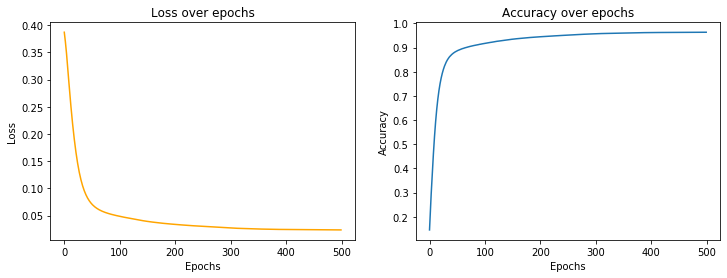

In [9]:
# Plot loss and accuracy over time
loss = history.history['loss']
accuracy = history.history['cosine_similarity']

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(range(num_epochs), loss, color='orange')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(range(num_epochs), accuracy)
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [10]:
# Get the latent or bottleneck layer. In our network corresponds to the fifth layer.
latent_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[4].output)
embedding = latent_model.predict(data)
malignant = embedding[target == 0]
benign = embedding[target == 1]

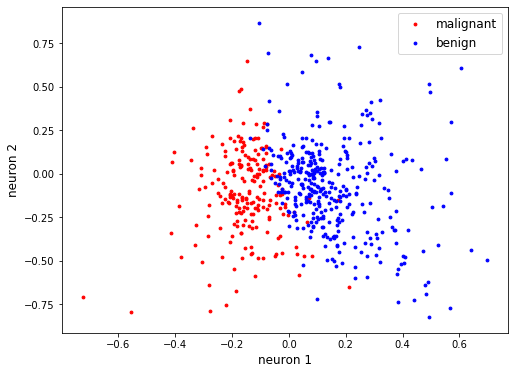

In [11]:
# Visualize embedding
plt.figure(figsize=(8, 6))
plt.scatter(malignant[:, 0], malignant[:, 1], color='red', s=8)
plt.scatter(benign[:, 0], benign[:, 1], color='blue', s=8)
plt.legend(['malignant', 'benign'], fontsize=12, loc='best')
plt.xlabel('neuron 1', fontsize=12)
plt.ylabel('neuron 2', fontsize=12)
plt.show()

In [12]:
svc = LinearSVC(C=1).fit(embedding, target)
svc.score(embedding, target)

0.9525483304042179

In [13]:
h = 0.01
x_min, x_max = embedding[:, 0].min() - 0.1, embedding[:, 0].max() + 0.1
y_min, y_max = embedding[:, 1].min() - 0.1, embedding[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [14]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

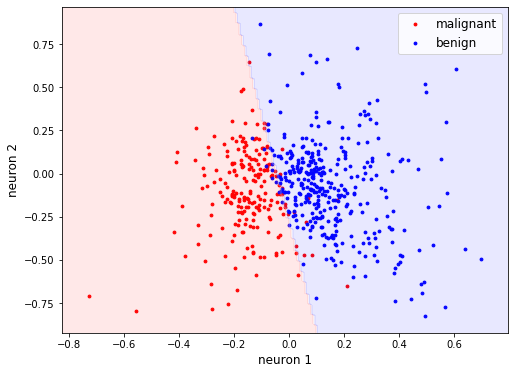

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(malignant[:, 0], malignant[:, 1], color='red', s=8)
plt.scatter(benign[:, 0], benign[:, 1], color='blue', s=8)
plt.contourf(xx, yy, Z, cmap=plt.cm.bwr_r, alpha=0.1)
plt.legend(['malignant', 'benign'], fontsize=12, loc='best')
plt.xlabel('neuron 1', fontsize=12)
plt.ylabel('neuron 2', fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()